In [1]:
!pip install pyserial


Defaulting to user installation because normal site-packages is not writeable


In [1]:
import serial
import time
import csv
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# 경고 메시지 무시
warnings.filterwarnings("ignore")

In [399]:
# 시리얼 포트 설정
ser = serial.Serial('COM5', 9600)  # COMX는 아두이노가 연결된 포트를 나타냅니다.

In [347]:
ser.close()

In [15]:
help(ser)

Help on Serial in module serial.serialwin32 object:

class Serial(serial.serialutil.SerialBase)
 |  Serial(*args, **kwargs)
 |  
 |  Serial port implementation for Win32 based on ctypes.
 |  
 |  Method resolution order:
 |      Serial
 |      serial.serialutil.SerialBase
 |      io.RawIOBase
 |      _io._RawIOBase
 |      io.IOBase
 |      _io._IOBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize comm port object. If a "port" is given, then the port will be
 |      opened immediately. Otherwise a Serial port object in closed state
 |      is returned.
 |  
 |  cancel_read(self)
 |      Cancel a blocking read operation, may be called from other thread
 |  
 |  cancel_write(self)
 |      Cancel a blocking write operation, may be called from other thread
 |  
 |  close(self)
 |      Close port
 |  
 |  flush(self)
 |      Flush of file like objects. In this case, wait until all data
 |      is written.
 |  
 |  open(sel

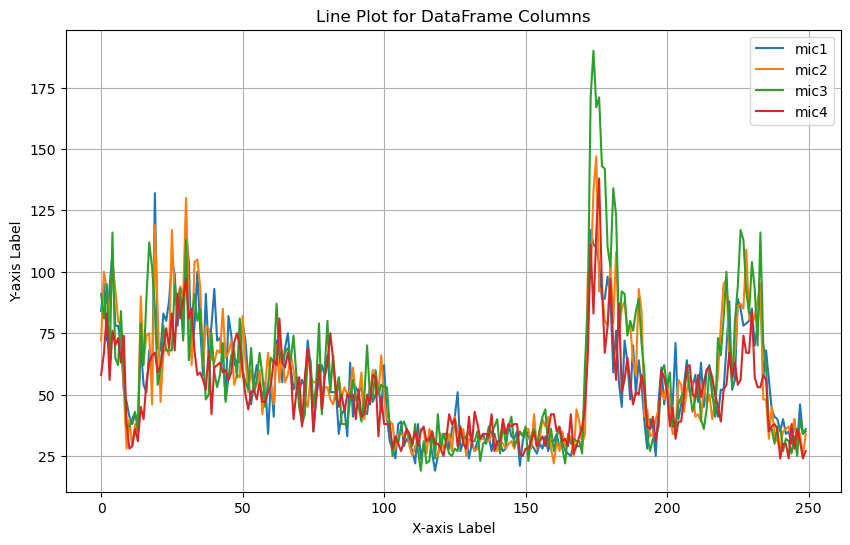

In [646]:
read_duration_seconds = 5  # 10초 동안 읽기
start_time = time.time()  # 시작 시간 기록
int_array = []
while (time.time() - start_time) < read_duration_seconds:
    str_values = ser.readline().decode('utf-8').strip().split(",")
    for str_value in str_values:
        if str_value == '':
            str_value = '0'
        int_value = int(str_value)  # 문자열을 정수로 변환
        int_array.append(int_value)  # 정수를 리스트에 추가
        
int_array = int_array[-1000:]

# 데이터를 저장할 빈 DataFrame 생성
df = pd.DataFrame(columns=["mic1", "mic2", "mic3", "mic4"])

# 리스트를 4개씩 끊어서 DataFrame에 추가
for i in range(0, 1000, 4):
    chunk = int_array[i:i+4]
    if len(chunk) == 4:
        df = df.append(pd.Series(chunk, index=df.columns), ignore_index=True)

# 그림 크기 설정
plt.figure(figsize=(10, 6))

# 각 열을 꺾은 선 그래프로 그리기
for i in range(0, 4):
    y = df.iloc[:, i]
    plt.plot(df.index, y, linestyle='-', label=df.columns[i])

# 그래프 제목, 레이블 등을 추가
plt.title('Line Plot for DataFrame Columns')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# 범례 표시
plt.legend()

# 그리드 표시
plt.grid(True)

# 그래프 표시
plt.show()

x = -70
y = 81

# x와 y 값을 사용하여 CSV 파일 이름을 동적으로 생성
file_name = f"{x}_{y}.csv"

folder_path = './dataset2'  # 원하는 폴더 경로로 변경
file_path = os.path.join(folder_path, file_name)
# DataFrame을 동적으로 생성된 파일 이름으로 저장
df.to_csv(file_path, index=False)

# 

In [33]:
df

,mic1,mic2,mic3,mic4
0,139,97,67,205
1,82,124,117,228
2,138,120,119,246
3,107,83,76,173
4,147,76,98,229
...,...,...,...,...
245,202,186,180,269
246,223,215,209,284
247,134,158,134,193
248,261,157,153,212


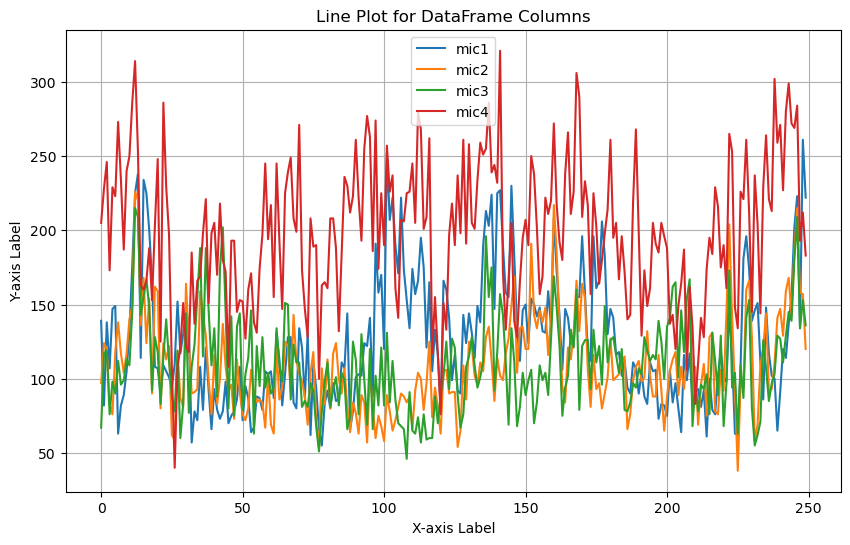